In [171]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [172]:
routes = [
    ((0, 0), (1, 1)),
    ((0, 0), (2, 2)),
    ((0, 0), (3, 3)),
    ((0, 0), (4, 4))
]

In [173]:
costs= []
for start, end in routes:
    distance= np.sqrt((end[0]-start[0])**2 + (end[1]-start[1])**2)
    costs.append(distance)

In [174]:
costs

[1.4142135623730951, 2.8284271247461903, 4.242640687119285, 5.656854249492381]

In [175]:
min_cost_idx = costs.index(min(costs))

In [176]:
optimal_path = format(min_cost_idx, '02b')

In [177]:
optimal_path

'00'

In [178]:
def phase_oracle(qc, optimal_path):
    
    for i in range(len(optimal_path)):
        if optimal_path[i] == '0':
            qc.x(i)
    
    
    qc.h(1)
    qc.cz(0, 1)
    qc.h(1)
    
    
    for i in range(len(optimal_path)):
        if optimal_path[i] == '0':
            qc.x(i)

In [190]:
def diffuser(qc):
    qc.h([0, 1])  
    qc.x([0, 1])  

    
    qc.h(1)
    qc.cz(0, 1)
    qc.h(1)

    qc.x([0, 1])  
    qc.h([0, 1]) 


In [191]:
qc= QuantumCircuit(2)

In [192]:
iterations = 2

In [193]:
qc.h([0, 1])

In [194]:
for _ in range(iterations):
    phase_oracle(qc,optimal_path)
    diffuser(qc)

In [184]:
qc.measure_all()

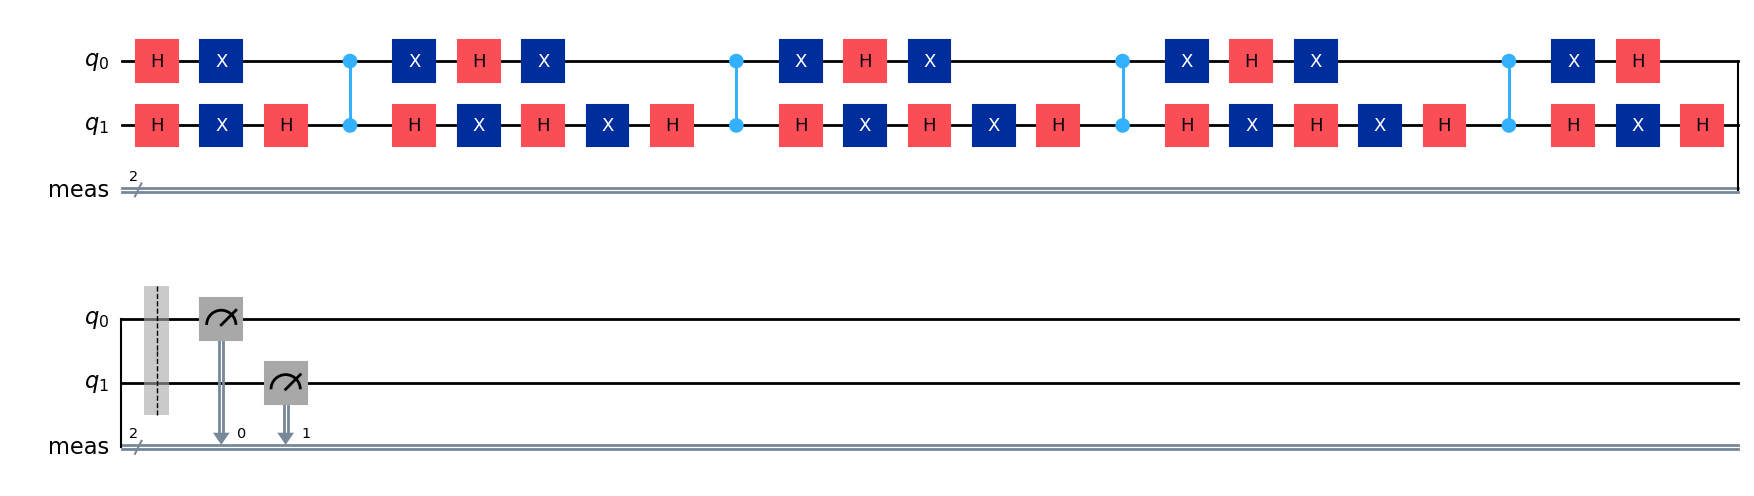

In [185]:
qc.draw('mpl')

In [186]:
backend= AerSimulator()
tqc = transpile(qc, backend)
job= backend.run(tqc,shots=1000)
result = job.result()

In [187]:
counts = result.get_counts(qc)

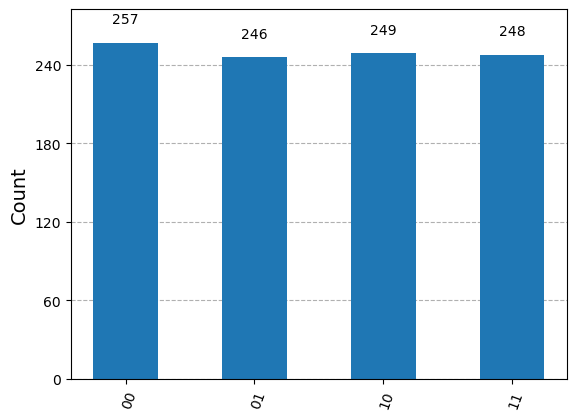

In [188]:
plot_histogram(counts)

In [189]:
print(counts)

{'11': 248, '01': 246, '00': 257, '10': 249}
